# Statistiques descriptives

In [1]:
import pandas as pd
import numpy as np
import os
import s3fs
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import warnings

In [2]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [3]:
# Import cleaning and merge functions
exec(open('0_KPI_functions.py').read())

# Useful functions :
    # display_databases(directory_path, file_name = ['customerplus_cleaned', 'target_information', 'campaigns_information', 'products_purchased_reduced'], datetime_col = None)
    # campaigns_kpi_function(campaigns_information = None)
    # tickets_kpi_function(tickets_information = None)
    # customerplus_kpi_function(customerplus_clean = None)

In [4]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [5]:
# Additional function to load initial 
def load_dataset_2(directory_path, file_name):
    """
    This function loads csv file
    """
    file_path = "bdc2324-data" + "/" + directory_path + "/" + directory_path + file_name + ".csv"
    with fs.open(file_path, mode="rb") as file_in:
        df = pd.read_csv(file_in, sep=",")

    # drop na :
    #df = df.dropna(axis=1, thresh=len(df))
    # if identifier in table : delete it
    if 'identifier' in df.columns:
        df = df.drop(columns = 'identifier')
    return df

In [56]:
companies = {'musee' : ['1', '2', '3', '4', '101'],
            'sport': ['5', '6', '7', '8', '9'],
            'musique' : ['10', '11', '12', '13', '14']}

# 0 - Specificité de la company 101

In [33]:
company_number = '101'

facilities = load_dataset_2(company_number, "facilities")

facilities.sort_values(by = 'street_id')

id                                   name  \
26      1                   atelier des lumieres   
17  14007                  fabrique des lumieres   
32      2                             non défini   
10  10755                                    NaN   
16  13583                       hôtel de caumont   
2   16422         atelier des lumières - cézanne   
20  21098   bassins des lumières - 2022 - venise   
18  23460                          immersive box   
8   13584          bassins des lumières - venise   
15  21096  atelier des lumières - 2022 - cézanne   
27    260                 musée jacquemart andré   
33     71                   cité de l'automobile   
30     89                    bassins de lumieres   
7     108                   les baux de provence   
19    161              les carrières de lumières   
24    118           villa ephrussi de rothschild   
29    128                 théâtre antique orange   
28   3875                  carrieres de lumieres   
25   3866                       baux-de-provence   
22    392                    tour magne de nîmes   
3     263                          musée maillol   
6     264                 cinéma d'aigues mortes   
21    388                 maison carrée de nîmes   
23    333                    les arènes de nîmes   
31    170                   caumont centre d'art   
5    1665                         cité de l'auto   
14  11836                   phoenix des lumières   
1   13501                   château de boutemont   
4   13502                  fabrique des lumières   
12  22219                 immersive box belgique   
13  22512                      hall des lumières   
11  22348                                    hdl   
0   22516                      hall des lumieres   
9   11835                               hdl - ny   

                          created_at                        updated_at  \
26  2020-10-12 08:57:27.783770+02:00  2020-10-12 08:57:27.783770+02:00   
17  2022-05-17 09:11:19.416106+02:00  2022-05-17 09:11:19.416106+02:00   
32  2020-10-12 08:57:27.785329+02:00  2020-10-12 08:57:27.785329+02:00   
10  2022-01-28 12:07:16.602885+01:00  2022-01-28 12:07:16.602885+01:00   
16  2022-05-13 10:59:06.829576+02:00  2022-05-13 10:59:06.829576+02:00   
2   2022-08-04 04:03:31.045648+02:00  2022-08-04 04:03:31.045648+02:00   
20  2023-04-08 03:49:46.916777+02:00  2023-04-08 03:49:46.916777+02:00   
18  2023-08-29 17:39:55.188028+02:00  2023-08-29 17:39:55.188028+02:00   
8   2022-05-13 11:00:14.943669+02:00  2022-05-13 11:00:14.943669+02:00   
15  2023-04-08 03:42:10.395124+02:00  2023-04-08 03:42:10.395124+02:00   
27  2020-10-18 01:20:12.738229+02:00  2020-10-18 01:20:12.738229+02:00   
33  2020-10-13 11:05:43.705639+02:00  2020-12-03 08:33:15.576065+01:00   
30  2020-10-13 14:56:27.206958+02:00  2020-10-13 14:56:27.206958+02:00   
7   2020-10-14 14:16:20.284658+02:00  2020-10-14 14:16:20.284658+02:00   
19  2020-10-14 18:06:57.059828+02:00  2020-10-14 18:06:57.059828+02:00   
24  2020-10-14 15:02:40.478501+02:00  2020-10-14 15:02:40.478501+02:00   
29  2020-10-14 15:46:44.072307+02:00  2020-10-14 15:46:44.072307+02:00   
28  2021-06-11 10:52:15.706030+02:00  2021-06-11 10:52:15.706030+02:00   
25  2021-06-11 10:28:30.237144+02:00  2021-06-11 10:28:30.237144+02:00   
22  2020-10-19 17:51:45.915572+02:00  2020-10-19 17:51:45.915572+02:00   
3   2020-10-18 01:30:23.853673+02:00  2020-10-18 01:30:23.853673+02:00   
6   2020-10-18 01:30:23.863631+02:00  2020-10-18 01:30:23.863631+02:00   
21  2020-10-19 17:37:09.345955+02:00  2020-10-19 17:37:09.345955+02:00   
23  2020-10-19 10:17:55.757817+02:00  2020-10-19 10:17:55.757817+02:00   
31  2020-10-14 19:13:55.213186+02:00  2022-10-14 06:21:53.310810+02:00   
5   2020-12-08 18:46:15.957997+01:00  2020-12-08 18:46:15.957997+01:00   
14  2022-03-08 16:30:03.135537+01:00  2022-03-08 16:30:03.135537+01:00   
1   2022-05-10 14:56:36.025562+02:00  2022-05-10 14:56:36.025562+02:00   
4   2022-05-10 15:05:40.443121+02:00  20

In [13]:
# contribution and contribution sites 
contributions = load_dataset_2(company_number, "contributions")
contribution_sites = load_dataset_2(company_number, "contribution_sites")

pd.merge(contributions, contribution_sites, left_on = 'contribution_site_id', right_on = 'id', how = 'inner')

id_x                           sent_at  software  satisfaction  \
0       134910         2017-07-30 15:50:15+02:00       NaN           8.0   
1      5848427  2020-03-04 16:18:13.597000+01:00       NaN           NaN   
2       918383  2020-10-24 14:59:22.784000+02:00       NaN           NaN   
3       918384  2020-10-24 14:35:39.725000+02:00       NaN           NaN   
4       918385  2020-10-24 12:45:35.225000+02:00       NaN          10.0   
...        ...                               ...       ...           ...   
25454     1951         2018-03-20 09:34:09+01:00       NaN           8.0   
25455     1952         2018-03-20 09:31:56+01:00       NaN           NaN   
25456     1954         2018-03-20 09:30:44+01:00       NaN           NaN   
25457     1955         2018-03-20 09:28:49+01:00       NaN           8.0   
25458     1953  2018-03-20 09:31:23.361000+01:00       NaN           8.0   

       extra_field  customer_id  contribution_site_id  \
0              NaN        91936                    70   
1              NaN       224450                  3420   
2              NaN       397718                   208   
3              NaN       397719                   208   
4              NaN            2                   208   
...            ...          ...                   ...   
25454          NaN        69694                     1   
25455          NaN        69694                     1   
25456          NaN        69694                     1   
25457          NaN        69695                     1   
25458          NaN            2                     1   

                           created_at_x                      updated_at_x  \
0      2020-09-25 20:41:07.752795+02:00  2020-09-25 20:41:07.752795+02:00   
1      2022-01-21 02:44:34.857144+01:00  2022-01-21 02:44:34.857144+01:00   
2      2020-10-25 02:06:54.048105+02:00  2020-10-25 02:06:54.048105+02:00   
3      2020-10-25 02:06:54.050218+02:00  2020-10-25 02:06:54.050218+02:00   
4      2020-10-25 02:06:54.052201+02:00  2020-10-25 02:06:54.052201+02:00   
...                                 ...                               ...   
25454  2020-09-25 20:06:37.138272+02:00  2020-09-25 20:06:37.138272+02:00   
25455  2020-09-25 20:06:37.138874+02:00  2020-09-25 20:06:37.138874+02:00   
25456  2020-09-25 20:06:37.140372+02:00  2020-09-25 20:06:37.140372+02:00   
25457  2020-09-25 20:06:37.140966+02:00  2020-09-25 20:06:37.140966+02:00   
25458  2020-09-25 20:06:37.139437+02:00  2020-09-25 20:06:37.139437+02:00   

       id_y  facility_id                      created_at_y  \
0        70          438  2020-09-25 20:41:07.735280+02:00   
1      3420         6650  2022-01-21 02:44:34.690938+01:00   
2       208          576  2020-09-27 18:05:14.671650+02:00   
3       208          576  2020-09-27 18:05:14.671650+02:00   
4       208          576  2020-09-27 18:05:14.671650+02:00   
...     ...          ...                               ...   
25454     1          369  2020-09-25 20:06:35.964342+02:00   
25455     1          369  2020-09-25 20:06:35.964342+02:00   
25456     1          369  2020-09-25 20:06:35.964342+02:00   
25457     1          369  2020-09-25 20:06:35.964342+02:00   
25458     1          369  2020-09-25 20:06:35.964342+02:00   

                           updated_at_y  
0      2020-09-25 20:41:07.735280+02:00  
1      2022-01-21 02:44:34.690938+01:00  
2      2020-09-27 18:05:14.671650+02:00  
3      2020-09-27 18:05:14.671650+02:00  
4      2020-09-27 18:05:14.671650+02:00  
...                                 ...  
25454  2020-09-25 20:06:35.964342+02:00  
25455  2020-09-25 20:06:35.964342+02:00  
25456  2020-09-25 20:06:35.964342+02:00  
25457  2020-09-25 20:06:35.964342+02:00  
25458  2020-09-25 20:06:35.964342+02:00  

[25459 rows x 13 columns]

In [22]:
contributions.isna().sum()/len(contributions)

id                      0.000000
sent_at                 0.000000
software                1.000000
satisfaction            0.430732
extra_field             1.000000
customer_id             0.000000
contribution_site_id    0.000000
created_at              0.000000
updated_at              0.000000
dtype: float64

In [25]:
company_number = "2"

load_dataset_2(company_number, "currencies")

id name                        created_at                        updated_at
0   1  eur  2023-07-17 15:35:19.957203+02:00  2023-07-17 15:35:19.957203+02:00
1   2  usd  2023-07-17 15:35:21.132408+02:00  2023-07-17 15:35:21.132408+02:00
2   3  gbp  2023-07-17 15:35:21.843594+02:00  2023-07-17 15:35:21.843594+02:00
3   4  chf  2023-07-17 15:35:23.229322+02:00  2023-07-17 15:35:23.229322+02:00
4   5  cad  2023-07-17 15:35:24.262466+02:00  2023-07-17 15:35:24.262466+02:00

In [32]:
load_dataset_2(company_number, "products_groups")

id  percent_price  max_price  min_price  category_id  \
0            1          100.0        0.0        0.0            1   
1            2          100.0        0.0        0.0            1   
2            3          100.0        0.0        0.0            1   
3            4          100.0        0.0        0.0            1   
4            5          100.0        0.0        0.0            1   
...        ...            ...        ...        ...          ...   
779980  810312          100.0        0.0        0.0            1   
779981  810313          100.0        0.0        0.0            1   
779982  810314          100.0        0.0        0.0            1   
779983  810315          100.0        0.0        0.0            1   
779984  810316          100.0        0.0        0.0            1   

        pricing_formula_id  representation_id  \
0                        1                  1   
1                        1                  2   
2                        1                  3   
3                        1                  4   
4                        1                  5   
...                    ...                ...   
779980                   1             567254   
779981                   4             567254   
779982                   1             567255   
779983                   1             567256   
779984                   1             567257   

                              created_at                        updated_at  
0       2023-10-13 13:02:32.517137+02:00  2023-10-13 13:02:32.517137+02:00  
1       2023-10-13 13:02:32.531505+02:00  2023-10-13 13:02:32.531505+02:00  
2       2023-10-13 13:02:32.532172+02:00  2023-10-13 13:02:32.532172+02:00  
3       2023-10-13 13:02:32.532665+02:00  2023-10-13 13:02:32.532665+02:00  
4       2023-10-13 13:02:32.533142+02:00  2023-10-13 13:02:32.533142+02:00  
...                                  ...                               ...  
779980  2023-11-09 05:14:16.770130+01:00  2023-11-09 05:14:16.770130+01:00  
779981  2023-11-09 05:14:16.770538+01:00  2023-11-09 05:14:16.770538+01:00  
779982  2023-11-09 05:14:16.770916+01:00  2023-11-09 05:14:16.770916+01:00  
779983  2023-11-09 05:14:16.771359+01:00  2023-11-09 05:14:16.771359+01:00  
779984  2023-11-09 05:14:16.771761+01:00  2023-11-09 05:14:16.771761+01:00  

[779985 rows x 9 columns]

# 1 - Comportement d'achat

In [34]:
for company_number in ['1', '2', '3', '4', '101'] :
    nom_dataframe = 'df'+ company_number +'_tickets'
    globals()[nom_dataframe] = display_databases(company_number, file_name = 'products_purchased_reduced' , datetime_col = ['purchase_date'])

    if company_number == "101" :
        df101_tickets_1 = display_databases(company_number, file_name = 'products_purchased_reduced_1' , datetime_col = ['purchase_date'])

    

File path :  projet-bdc2324-team1/0_Input/Company_1/products_purchased_reduced.csv


<string>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.


File path :  projet-bdc2324-team1/0_Input/Company_2/products_purchased_reduced.csv


<string>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.


File path :  projet-bdc2324-team1/0_Input/Company_3/products_purchased_reduced.csv


<string>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.


File path :  projet-bdc2324-team1/0_Input/Company_4/products_purchased_reduced.csv


<string>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
<string>:13: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.


File path :  projet-bdc2324-team1/0_Input/Company_101/products_purchased_reduced.csv


<string>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.


File path :  projet-bdc2324-team1/0_Input/Company_101/products_purchased_reduced_1.csv


<string>:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.


## Outlier

In [13]:
def outlier_detection(directory_path = "1", coupure = 1):
    nom_dataframe = 'df'+ directory_path +'_tickets'
    df_tickets = globals()[nom_dataframe].copy()
    df_tickets_kpi = tickets_kpi_function(df_tickets)

    if directory_path == "101" :
        df_tickets_1 = df101_tickets_1.copy()
        df_tickets_kpi_1 = tickets_kpi_function(df_tickets_1)

        df_tickets_kpi = pd.concat([df_tickets_kpi, df_tickets_kpi_1])
    # Part du CA par customer
    total_amount_share = df_tickets_kpi.groupby('customer_id')['total_amount'].sum().reset_index()
    total_amount_share['total_amount_entreprise'] = total_amount_share['total_amount'].sum()
    total_amount_share['share_total_amount'] = total_amount_share['total_amount']/total_amount_share['total_amount_entreprise']
    
    total_amount_share_index = total_amount_share.set_index('customer_id')
    df_circulaire = total_amount_share_index['total_amount'].sort_values(axis = 0, ascending = False)
    
    top = df_circulaire[:coupure]
    rest = df_circulaire[coupure:]
    
    # Calculez la somme du reste
    rest_sum = rest.sum()
    
    # Créez une nouvelle série avec les cinq plus grandes parts et 'Autre'
    new_series = pd.concat([top, pd.Series([rest_sum], index=['Autre'])])
    
    # Créez le graphique circulaire
    plt.figure(figsize=(3, 3))
    plt.pie(new_series, labels=new_series.index, autopct='%1.1f%%', startangle=140, pctdistance=0.5)
    plt.axis('equal')  # Assurez-vous que le graphique est un cercle
    plt.title('Répartition des montants totaux')
    plt.show()


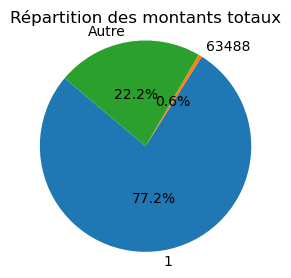

In [14]:
outlier_detection(directory_path = "1", coupure = 2)

In [32]:
df = load_dataset_2('1', 'customersplus')
df[df['id'] == 1]

id lastname firstname birthdate email  street_id  \
58201   1      NaN       NaN       NaN   NaN          2   

                             created_at                        updated_at  \
58201  2020-09-03 13:11:25.569167+02:00  2023-03-04 13:27:42.761679+01:00   

       civility  is_partner  extra  deleted_at  reference  gender  \
58201       NaN       False    NaN         NaN        NaN       2   

       is_email_true  extra_field  opt_in  structure_id note profession  \
58201           True          NaN   False           NaN  NaN        NaN   

      language  mcp_contact_id  need_reload     last_buying_date  max_price  \
58201      NaN             NaN        False  2023-11-08 03:20:07       45.0   

       ticket_sum  average_price  fidelity  average_purchase_delay  \
58201     1254775       7.030122    330831              -67.790969   

       average_price_basket  average_ticket_basket  total_price  \
58201              13.75153               1.956087    8821221.5   

       preferred_category  preferred_supplier  preferred_formula  \
58201                 NaN                 NaN                NaN   

       purchase_count          first_buying_date  last_visiting_date zipcode  \
58201          641472  2013-06-10 12:37:58+02:00                 NaN     NaN   

      country  age  tenant_id  
58201      fr  NaN       1311

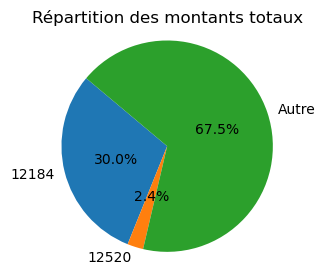

In [15]:
outlier_detection(directory_path = "2", coupure = 2)

In [33]:
df = load_dataset_2('2', 'customersplus')
df[df['id'] == 12184]

id lastname firstname birthdate email  street_id  \
170246  12184      NaN       NaN       NaN   NaN       3564   

                              created_at                        updated_at  \
170246  2023-10-12 12:25:15.438714+02:00  2023-11-09 05:14:01.944407+01:00   

        civility  is_partner  extra  deleted_at  reference  gender  \
170246       NaN       False    NaN         NaN        NaN       2   

        is_email_true  extra_field  opt_in  structure_id note profession  \
170246           True          NaN   False        1275.0  NaN        NaN   

       language  mcp_contact_id  need_reload            last_buying_date  \
170246      NaN             NaN        False  2023-11-08 19:17:50.565000   

        max_price  ticket_sum  average_price  fidelity  \
170246       75.0      512831      12.645438    197358   

        average_purchase_delay  average_price_basket  average_ticket_basket  \
170246                     0.0             31.719577               2.508381   

        total_price  preferred_category  preferred_supplier  \
170246    6484972.4                 NaN                 NaN   

        preferred_formula  purchase_count                 first_buying_date  \
170246                NaN          204447  2020-08-28 08:55:55.710000+02:00   

        last_visiting_date zipcode country  age  tenant_id  
170246                 NaN     NaN     NaN  NaN       1879

In [34]:
df.sort_values(by = 'id')

id        lastname        firstname birthdate        email  \
102639       1             NaN              NaN       NaN       email1   
224453       2             NaN       firstname2       NaN          NaN   
103013       3             NaN       firstname3       NaN          NaN   
138386       4             NaN       firstname4       NaN          NaN   
190087       5             NaN       firstname5       NaN          NaN   
...        ...             ...              ...       ...          ...   
101868  601387  lastname601387  firstname601387       NaN  email601387   
205168  601388  lastname601388  firstname601388       NaN  email601388   
67641   601389  lastname601389  firstname601389       NaN  email601389   
67639   601390  lastname601390  firstname601390       NaN  email601390   
256450  601391  lastname601391  firstname601391       NaN  email601391   

        street_id                        created_at  \
102639          1  2023-07-20 17:16:27.062822+02:00   
224453          2  2023-07-21 10:18:44.502496+02:00   
103013          3  2023-07-21 10:18:44.503913+02:00   
138386          3  2023-07-21 10:18:44.504404+02:00   
190087          3  2023-07-21 10:18:44.504841+02:00   
...           ...                               ...   
101868       3550  2023-11-09 05:13:57.358715+01:00   
205168       3550  2023-11-09 05:13:57.359234+01:00   
67641        3550  2023-11-09 05:13:57.360373+01:00   
67639        3550  2023-11-09 05:13:57.360903+01:00   
256450       3550  2023-11-09 05:13:57.361432+01:00   

                              updated_at  civility  is_partner  extra  \
102639  2023-07-20 17:16:27.074952+02:00       NaN       False    NaN   
224453  2023-07-21 10:18:44.502496+02:00       NaN       False    NaN   
103013  2023-07-21 10:18:44.503913+02:00       NaN       False    NaN   
138386  2023-07-21 10:18:44.504404+02:00       NaN       False    NaN   
190087  2023-07-21 10:18:44.504841+02:00       NaN       False    NaN   
...                                  ...       ...         ...    ...   
101868  2023-11-09 05:13:57.358715+01:00       NaN       False    NaN   
205168  2023-11-09 05:13:57.359234+01:00       NaN       False    NaN   
67641   2023-11-09 05:13:57.360373+01:00       NaN       False    NaN   
67639   2023-11-09 05:13:57.360903+01:00       NaN       False    NaN   
256450  2023-11-09 05:14:18.906054+01:00       NaN       False    NaN   

        deleted_at  reference  gender  is_email_true  extra_field  opt_in  \
102639         NaN        NaN       2           True          NaN   False   
224453         NaN        NaN       1           True          NaN   False   
103013         NaN        NaN       2           True          NaN   False   
138386         NaN        NaN       2           True          NaN   False   
190087         NaN        NaN       1           True          NaN   False   
...            ...        ...     ...            ...          ...     ...   
101868         NaN        NaN       2           True          NaN   False   
205168         NaN        NaN       2           True          NaN   False   
67641          NaN        NaN       2           True          NaN   False   
67639          NaN        NaN       0           True          NaN   False   
256450         NaN        NaN       2           True          NaN   False   

        structure_id note profession language  mcp_contact_id  need_reload  \
102639           NaN  NaN        NaN      NaN             1.0        False   
224453           NaN  NaN        NaN    josef             NaN        False   
103013           NaN  NaN        NaN  dominic             NaN        False   
138386           NaN  NaN        NaN  abigail             NaN        False   
190087           NaN  NaN        NaN   sophia             NaN        False   
...              ...  ...        ...      ...             ...          ...   
101868           NaN  NaN        NaN       de             NaN        False   
205168           NaN  NaN        NaN

File path :  projet-bdc2324-team1/0_Input/Company_3/products_purchased_reduced.csv


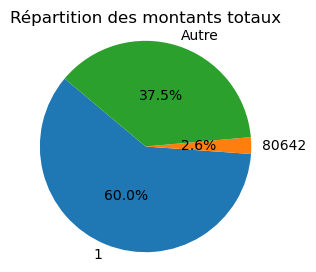

In [24]:
outlier_detection(directory_path = "3", coupure = 2)

In [36]:
df = load_dataset_2('3', 'customersplus')
df[df['id'] == 1]

id lastname firstname   birthdate email  street_id  \
105720   1      NaN       NaN  1961-12-04   NaN      91159   

                              created_at                        updated_at  \
105720  2021-03-02 15:35:40.452065+01:00  2023-11-09 01:31:07.539604+01:00   

        civility  is_partner  extra  deleted_at  reference  gender  \
105720       NaN       False    NaN         NaN        NaN       2   

        is_email_true  extra_field  opt_in  structure_id note profession  \
105720          False          NaN   False       19715.0  NaN        NaN   

        language  mcp_contact_id  need_reload     last_buying_date  max_price  \
105720       NaN             NaN        False  2023-11-06 16:57:19     7500.0   

        ticket_sum  average_price  fidelity  average_purchase_delay  \
105720     2297716      10.152196     14917           -39771.165147   

        average_price_basket  average_ticket_basket   total_price  \
105720             27.514811               2.710232  2.332686e+07   

        preferred_category  preferred_supplier  preferred_formula  \
105720                 NaN                 NaN                NaN   

        purchase_count          first_buying_date   last_visiting_date  \
105720          847793  2016-01-01 10:23:36+01:00  2023-11-06 17:12:00   

       zipcode country   age  tenant_id  
105720   13090      fr  61.0       1512

File path :  projet-bdc2324-team1/0_Input/Company_4/products_purchased_reduced.csv


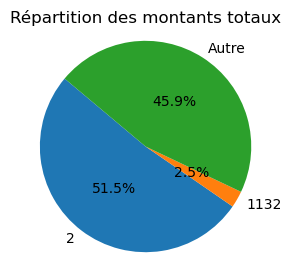

In [25]:
outlier_detection(directory_path = "4", coupure = 2)

In [37]:
df = load_dataset_2('4', 'customersplus')
df[df['id'] == 2]

id lastname firstname birthdate email  street_id  \
300754   2      NaN       NaN       NaN   NaN          2   

                              created_at                        updated_at  \
300754  2020-09-25 19:09:07.669208+02:00  2021-11-30 02:07:28.120188+01:00   

        civility  is_partner  extra  deleted_at  reference  gender  \
300754       NaN       False    NaN         NaN        NaN       2   

        is_email_true  extra_field  opt_in  structure_id note profession  \
300754          False          NaN   False           NaN  NaN        NaN   

       language  mcp_contact_id  need_reload     last_buying_date  max_price  \
300754      NaN             NaN        False  2023-11-07 16:33:09      360.0   

        ticket_sum  average_price  fidelity  average_purchase_delay  \
300754     1237224       6.056248    236850                0.015528   

        average_price_basket  average_ticket_basket  total_price  \
300754             13.493612               2.228048    7492935.0   

        preferred_category  preferred_supplier  preferred_formula  \
300754                 NaN                 NaN                NaN   

        purchase_count          first_buying_date  last_visiting_date zipcode  \
300754          555295  1901-01-01 00:09:21+00:09                 NaN     NaN   

       country  age  tenant_id  
300754     NaN  NaN       1342

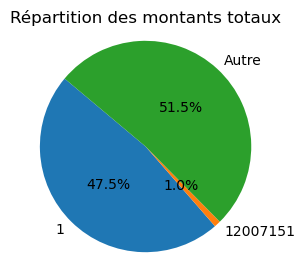

In [16]:
outlier_detection(directory_path = "101", coupure = 2)

## Evolution des commandes

In [8]:
# Importation - Chargement des données temporaires
company_number = "1"
nom_dataframe = 'df'+ company_number +'_tickets'
purchases = globals()[nom_dataframe].copy()

campaigns = display_databases(company_number,'campaigns_information', ['sent_at'])


/tmp/ipykernel_448/3643128924.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchases = pd.read_csv(file_in, sep=",", parse_dates = ['purchase_date'], date_parser=custom_date_parser)
/tmp/ipykernel_448/3643128924.py:19: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  campaigns = pd.read_csv(file_in, sep=",", parse_dates = ['sent_at'], date_parser=custom_date_parser)


In [9]:
# Mois du premier achat
purchase_min = purchases.groupby(['customer_id'])['purchase_date'].min().reset_index()
purchase_min.rename(columns = {'purchase_date' : 'first_purchase_event'}, inplace = True)
purchase_min['first_purchase_event'] = pd.to_datetime(purchase_min['first_purchase_event'])
purchase_min['first_purchase_month'] = pd.to_datetime(purchase_min['first_purchase_event'].dt.strftime('%Y-%m'))

# Mois du premier mails
first_mail_received = campaigns.groupby('customer_id')['sent_at'].min().reset_index()
first_mail_received.rename(columns = {'sent_at' : 'first_email_reception'}, inplace = True)
first_mail_received['first_email_reception'] = pd.to_datetime(first_mail_received['first_email_reception'])
first_mail_received['first_email_month'] = pd.to_datetime(first_mail_received['first_email_reception'].dt.strftime('%Y-%m'))

# Fusion 
known_customer = pd.merge(purchase_min[['customer_id', 'first_purchase_month']], 
                          first_mail_received[['customer_id', 'first_email_month']], on = 'customer_id', how = 'outer')

# Mois à partir duquel le client est considere comme connu
known_customer['known_date'] = pd.to_datetime(known_customer[['first_email_month', 'first_purchase_month']].min(axis = 1), utc = True, format = 'ISO8601')

In [10]:
# Nombre de commande par mois
purchases_count = pd.merge(purchases[['customer_id', 'purchase_id', 'purchase_date']].drop_duplicates(), known_customer[['customer_id', 'known_date']], on = ['customer_id'], how = 'inner')
purchases_count['is_customer_known'] = purchases_count['purchase_date'] > purchases_count['known_date'] + pd.DateOffset(months=1)
purchases_count['purchase_date_month'] = pd.to_datetime(purchases_count['purchase_date'].dt.strftime('%Y-%m'))
purchases_count = purchases_count[purchases_count['customer_id'] != 1]

# Nombre de commande par mois par type de client
nb_purchases_graph = purchases_count.groupby(['purchase_date_month', 'is_customer_known'])['purchase_id'].count().reset_index()
nb_purchases_graph.rename(columns = {'purchase_id' : 'nb_purchases'}, inplace = True)

nb_purchases_graph_2 = purchases_count.groupby(['purchase_date_month', 'is_customer_known'])['customer_id'].nunique().reset_index()
nb_purchases_graph_2.rename(columns = {'customer_id' : 'nb_new_customer'}, inplace = True)

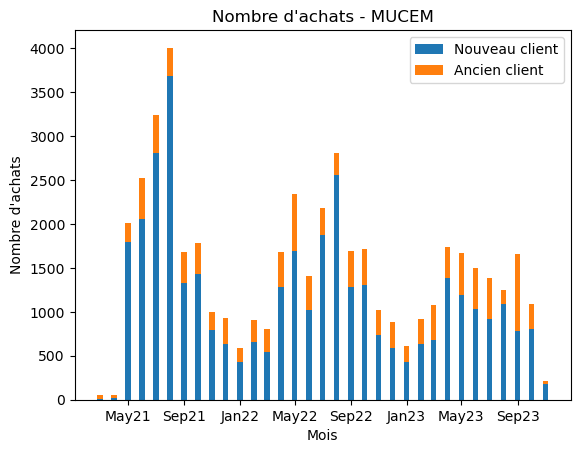

In [11]:
# Graphique en nombre de commande
purchases_graph = nb_purchases_graph

purchases_graph_used = purchases_graph[purchases_graph["purchase_date_month"] >= datetime(2021,3,1)]
purchases_graph_used_0 = purchases_graph_used[purchases_graph_used["is_customer_known"]==False]
purchases_graph_used_1 = purchases_graph_used[purchases_graph_used["is_customer_known"]==True]


# Création du barplot
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_0["nb_purchases"], width=12, label = "Nouveau client")
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_1["nb_purchases"], 
        bottom = purchases_graph_used_0["nb_purchases"], width=12, label = "Ancien client")


# commande pr afficher slt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))


# Ajout de titres et d'étiquettes
plt.xlabel('Mois')
plt.ylabel("Nombre d'achats")
plt.title("Nombre d'achats - MUCEM")
plt.legend()

# Affichage du barplot
plt.show()

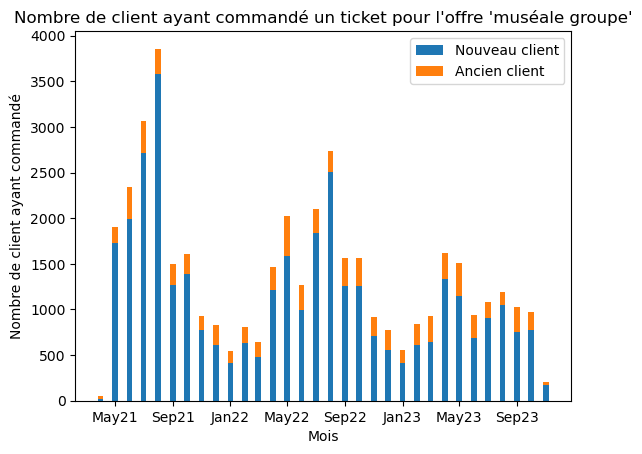

In [16]:
# graphique en nombre de client ayant commandé
purchases_graph = nb_purchases_graph_2

purchases_graph_used = purchases_graph[purchases_graph["purchase_date_month"] >= datetime(2021,4,1)]
purchases_graph_used_0 = purchases_graph_used[purchases_graph_used["is_customer_known"]==False]
purchases_graph_used_1 = purchases_graph_used[purchases_graph_used["is_customer_known"]==True]


# Création du barplot
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_0["nb_new_customer"], width=12, label = "Nouveau client")
plt.bar(purchases_graph_used_0["purchase_date_month"], purchases_graph_used_1["nb_new_customer"], 
        bottom = purchases_graph_used_0["nb_new_customer"], width=12, label = "Ancien client")


# commande pr afficher slt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))


# Ajout de titres et d'étiquettes
plt.xlabel('Mois')
plt.ylabel("Nombre de client ayant commandé")
plt.title("Nombre de client ayant commandé un ticket pour l'offre 'muséale groupe'")
plt.legend()

# Affichage du barplot
plt.show()

## Proportion de tickets de prix 0

In [35]:
barplot_prop_free_price = pd.DataFrame()
for company_number in ['1', '2', '3', '4', '101'] : # 
    nom_dataframe = 'df'+ company_number +'_tickets'
    df_tickets = globals()[nom_dataframe].copy()
    df_free_tickets = df_tickets[df_tickets['amount'] == 0 | df_tickets['amount'].isna()]

    if company_number == '101' :
        df_free_tickets_1 = df101_tickets_1[df101_tickets_1['amount'] == 0]
        nb_tickets = len(df_tickets) + len(df101_tickets_1)
        nb_free_tickets = len(df_free_tickets) + len(df_free_tickets_1)
        
        graph_dataframe = pd.DataFrame({'company_number' : [company_number], 
                                       'prop_free_tickets' : [nb_free_tickets / nb_tickets],
                                       'nb_tickets' : [nb_tickets]})
        
    else : 
        graph_dataframe = pd.DataFrame({'company_number' : [company_number], 
                                       'prop_free_tickets' : [len(df_free_tickets) / len(df_tickets)],
                                       'nb_tickets' : [len(df_tickets)]})

    barplot_prop_free_price = pd.concat([barplot_prop_free_price, graph_dataframe])

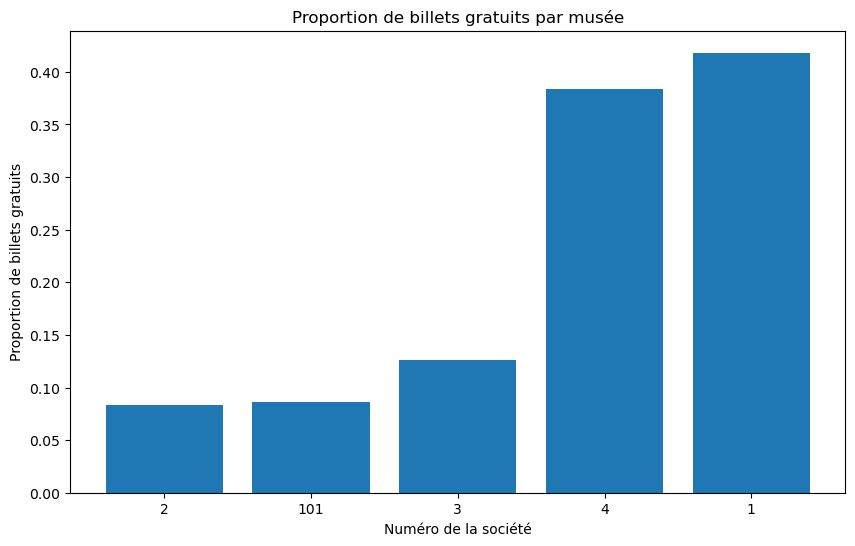

In [36]:
barplot_prop_free_price

df = barplot_prop_free_price.sort_values( by = 'prop_free_tickets')

# Création du barplot
plt.figure(figsize=(10, 6))
plt.bar(df['company_number'], df['prop_free_tickets'])
plt.xlabel('Numéro de la société')
plt.ylabel('Proportion de billets gratuits')
plt.title('Proportion de billets gratuits par musée')
plt.xticks(df['company_number'])
plt.show()

## Répartition des prix de vente

In [40]:
boxplot_amount = {}  

for company_number in ['1', '2', '3', '4', '101'] :
    nom_dataframe = 'df'+ company_number +'_tickets'
    df_tickets = globals()[nom_dataframe].copy()
    df_notfree_tickets = df_tickets[df_tickets['amount'] > 0]
    
    boxplot_amount[company_number] = df_notfree_tickets['amount']

amount_df = pd.DataFrame(boxplot_amount)

In [44]:
amount_df.describe()

1             2             3             4           101
count  1.062722e+06  1.475197e+06  3.051426e+06  1.280045e+06  1.133556e+07
mean   1.076436e+01  1.519766e+01  1.285360e+01  1.139475e+01  1.350509e+01
std    9.243106e+00  5.714467e+00  1.445236e+01  1.657010e+01  1.492325e+01
min    2.500000e+00  5.000000e+00  3.000000e-01  1.000000e+00  2.000000e-02
25%    9.500000e+00  1.300000e+01  6.000000e+00  6.000000e+00  1.000000e+01
50%    1.100000e+01  1.500000e+01  1.350000e+01  1.000000e+01  1.300000e+01
75%    1.100000e+01  1.500000e+01  1.700000e+01  1.200000e+01  1.450000e+01
max    3.200000e+02  3.000000e+02  7.500000e+03  1.500000e+03  1.633000e+03

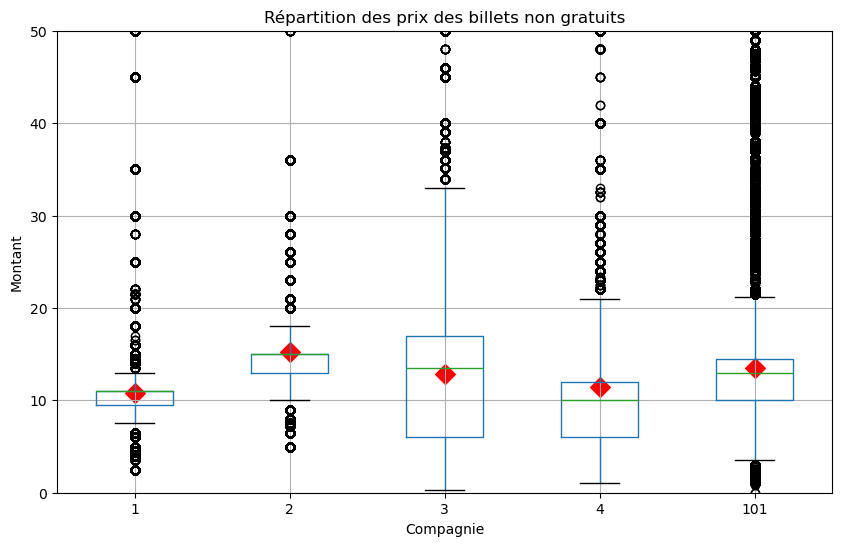

In [47]:
means = amount_df.mean()

plt.figure(figsize=(10, 6))
amount_df.boxplot()
plt.scatter(x=range(1, len(means) + 1), y=means, marker='D', color='red', s=100)
plt.title('Répartition des prix des billets non gratuits')
plt.ylabel('Montant')
plt.xlabel('Compagnie')
plt.ylim(0, 50) 
plt.show()

In [18]:
purchases.groupby('customer_id')[['purchase_id', 'ticket_id']].nunique().describe()

purchase_id     ticket_id
count   73518.000000  7.351800e+04
mean       10.096167  2.484660e+01
std      2367.702603  4.636993e+03
min         1.000000  1.000000e+00
25%         1.000000  1.000000e+00
50%         1.000000  2.000000e+00
75%         1.000000  3.000000e+00
max    641981.000000  1.256574e+06

In [17]:
purchases

ticket_id  customer_id  purchase_id  event_type_id   supplier_name  \
0         13070859        48187      5107462              4  vente en ligne   
1         13070860        48187      5107462              4  vente en ligne   
2         13070861        48187      5107462              4  vente en ligne   
3         13070862        48187      5107462              4  vente en ligne   
4         13070863        48187      5107462              4  vente en ligne   
...            ...          ...          ...            ...             ...   
1826667   20662815      1256135      8007697              5  vente en ligne   
1826668   20662816      1256136      8007698              5  vente en ligne   
1826669   20662817      1256136      8007698              5  vente en ligne   
1826670   20662818      1256137      8007699              5  vente en ligne   
1826671   20662819      1256137      8007699              5  vente en ligne   

                    purchase_date type_of_ticket_name  amount  \
0       2018-12-28 14:47:50+00:00             Atelier     8.0   
1       2018-12-28 14:47:50+00:00             Atelier     4.0   
2       2018-12-28 14:47:50+00:00             Atelier     4.0   
3       2018-12-28 14:47:50+00:00             Atelier     4.0   
4       2018-12-28 14:47:50+00:00             Atelier     4.0   
...                           ...                 ...     ...   
1826667 2023-11-08 17:23:54+00:00             Atelier    11.0   
1826668 2023-11-08 18:32:18+00:00             Atelier    11.0   
1826669 2023-11-08 18:32:18+00:00             Atelier    11.0   
1826670 2023-11-08 19:30:28+00:00             Atelier    11.0   
1826671 2023-11-08 19:30:28+00:00             Atelier    11.0   

                children  is_full_price      name_event_types name_facilities  \
0        pricing_formula          False      spectacle vivant           mucem   
1        pricing_formula          False      spectacle vivant           mucem   
2        pricing_formula          False      spectacle vivant           mucem   
3        pricing_formula          False      spectacle vivant           mucem   
4        pricing_formula          False      spectacle vivant           mucem   
...                  ...            ...                   ...             ...   
1826667  pricing_formula          False  offre muséale groupe           mucem   
1826668  pricing_formula          False  offre muséale groupe           mucem   
1826669  pricing_formula          False  offre muséale groupe           mucem   
1826670  pricing_formula          False  offre muséale groupe           mucem   
1826671  pricing_formula          False  offre muséale groupe           mucem   

           name_categories            name_events  name_seasons  
0        indiv prog enfant  l'école des magiciens          2018  
1        indiv prog enfant  l'école des magiciens          2018  
2        indiv prog enfant  l'école des magiciens          2018  
3        indiv prog enfant  l'école des magiciens          2018  
4        indiv prog enfant  l'école des magiciens          2018  
...                    ...                    ...           ...  
1826667   indiv entrées tp                    NaN          2023  
1826668   indiv entrées tp                    NaN          2023  
1826669   indiv entrées tp                    NaN          2023  
1826670   indiv entrées tp                    NaN          2023  
1826671   indiv entrées tp                    NaN          2023  

[1826672 rows x 15 columns]

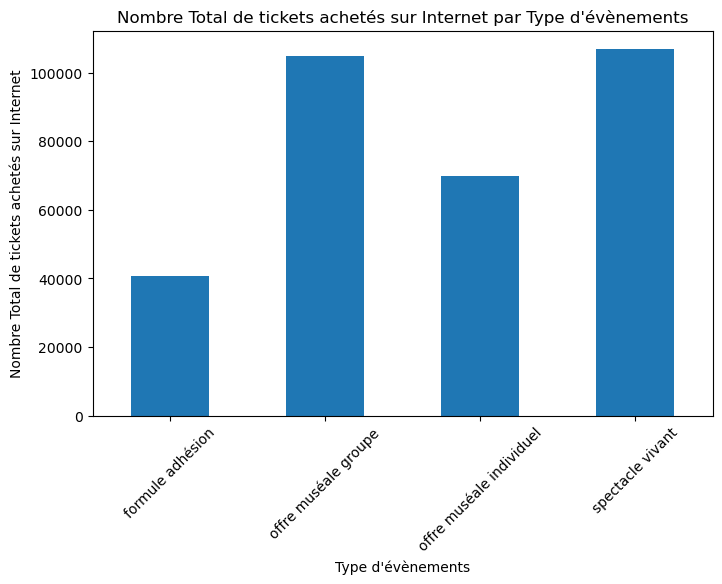

In [25]:
# Nombre Total de tickets achetés sur Internet par Type d'évènements

nb_tickets_internet = customer.groupby('name_event_types')['nb_tickets_internet'].sum()
nb_tickets_internet.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Total de tickets achetés sur Internet')
plt.title("Nombre Total de tickets achetés sur Internet par Type d'évènements")
plt.xticks(rotation=45)
plt.show()

# 2 - Autres informations sur client 

In [57]:
def tags_information(tenant_id, first_tags = 20):

    customersplus = load_dataset_2(tenant_id, "customersplus")[['id', 'structure_id']]
    customersplus.rename(columns = {'id' : 'customer_id'}, inplace = True)
    tags = load_dataset_2(tenant_id, "tags")[['id', 'name']]
    tags.rename(columns = {'id' : 'tag_id', 'name' : 'tag_name'}, inplace = True)
    structure_tag_mappings = load_dataset_2(tenant_id, "structure_tag_mappings")[['structure_id', 'tag_id']]
    
    customer_tags = pd.merge(customersplus, structure_tag_mappings, on = 'structure_id', how = 'left')
    customer_tags = pd.merge(customer_tags, tags, on = 'tag_id', how = 'inner')
    
    nb_customers_with_tag = customer_tags['customer_id'].nunique()
    
    # print('Nombre de client avec tag : ', nb_customers_with_tag)
    # print('Proportion de clients avec tags : ', nb_customers_with_tag/len(customersplus))
    # print('Moyenne de tags par client : ', len(customer_tags)/nb_customers_with_tag)
    
    # info = customer_tags.groupby(['tag_id', 'tag_name'])['customer_id'].count().reset_index().sort_values('customer_id', ascending = False).head(first_tags)

    tags_informations = pd.DataFrame({'company_number' : tenant_id,
                                      'nb_customers_with_tags' : [nb_customers_with_tag],
                                      'prop_customers_with_tags' : [nb_customers_with_tag/len(customersplus)],
                                      'mean_tags_per_customers' : [len(customer_tags)/nb_customers_with_tag]})
    
    return tags_informations

In [58]:
tags_comparaison = pd.DataFrame()

for tenant_id in companies['musee'] : 
    
    tags_comparaison = pd.concat([tags_comparaison, tags_information(tenant_id)])

Nombre de client avec tag :  13320
Proportion de clients avec tags :  0.0877089012682233
Moyenne de tags par client :  2.1725975975975977


/tmp/ipykernel_467/1769900082.py:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, sep=",")


Nombre de client avec tag :  5953
Proportion de clients avec tags :  0.021598421025897787
Moyenne de tags par client :  1.0


/tmp/ipykernel_467/1769900082.py:8: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, sep=",")


Nombre de client avec tag :  23659
Proportion de clients avec tags :  0.09207484608139978
Moyenne de tags par client :  3.0620482691576143
Nombre de client avec tag :  10495
Proportion de clients avec tags :  0.03271416949025744
Moyenne de tags par client :  5.298427822772749


/tmp/ipykernel_467/1769900082.py:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, sep=",")


Nombre de client avec tag :  532342
Proportion de clients avec tags :  0.18660686931118298
Moyenne de tags par client :  24.114082676174338


In [59]:
tags_comparaison

company_number  nb_customers_with_tags  prop_customers_with_tags  \
0              1                   13320                  0.087709   
0              2                    5953                  0.021598   
0              3                   23659                  0.092075   
0              4                   10495                  0.032714   
0            101                  532342                  0.186607   

   mean_tags_per_customers  
0                 2.172598  
0                 1.000000  
0                 3.062048  
0                 5.298428  
0                24.114083